## The Sparks Foundation

### GRIPAUGUST21

# Name: Shubham Patil

# Data Science and Business Analytics Intern

## Task 1: Prediction using Supervised ML

### Task: Predict the percentage of an student based on the no. of study hours.

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')

In [2]:
%matplotlib inline

## Reading the data

In [4]:
address = 'http://bit.ly/w-data'
data = pd.read_csv(address)
print("Shape of Data:",data.shape)
data.head(25)

Shape of Data: (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Checking for null values

In [5]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Insights about the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualization of the data

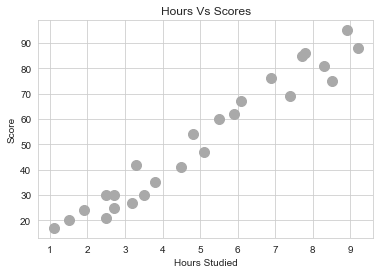

In [9]:
data.plot(kind='scatter', x='Hours', y='Scores', c=['darkgray'], s=100)
plt.title('Hours Vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

**From the above graph, we can conclude that there is positive relation between number of hours studied and scores of students**

## Using Seaborn

<AxesSubplot:title={'center':'Hours Vs Scores'}, xlabel='Hours', ylabel='Scores'>

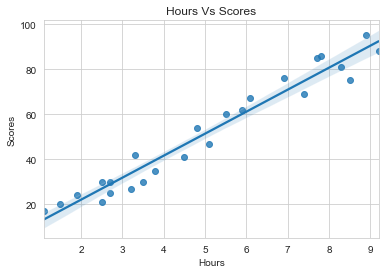

In [10]:
plt.title('Hours Vs Scores')
sb.regplot(x='Hours', y='Scores', data=data, scatter=True)

**From the above graph, we can conclude that there is positive relation between number of hours studied and scores of students**

## Preparing data

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values
print("X:",X, "\n")
print("Y:",y)

X: [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]] 

Y: [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


## Train Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
print(X_train.shape)
print(y_train.shape)

(20, 1)
(20,)


In [15]:
X_train[:5]

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1]])

## Deploying and Evaluating the Model

### Fitting the data into the model

In [16]:
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)
print(LinReg.intercept_, LinReg.coef_)

2.0181600414346974 [9.91065648]


In [17]:
X_train.shape

(20, 1)

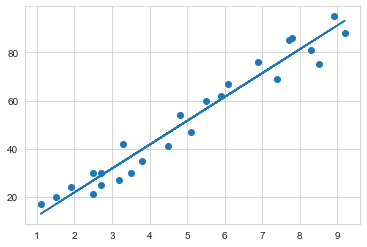

In [18]:
line = LinReg.coef_*X + LinReg.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Making Predictions

In [19]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [20]:
y_pred = LinReg.predict(X_test)

In [21]:
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Text(0, 0.5, 'Scores')

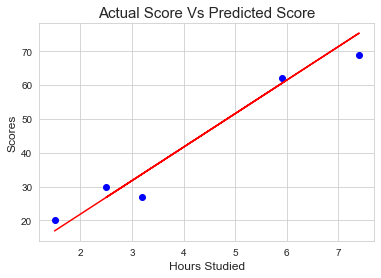

In [22]:
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Actual Score Vs Predicted Score', size=15)
plt.xlabel('Hours Studied', size=12)
plt.ylabel('Scores', size=12)

## Evaluation of the Model

In [23]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


## Question: Predict the score if student studies for 9.25 hours/day

### Using the equation

In [24]:
# for number of hours, X = 9.25
pred = LinReg.coef_*9.25 + LinReg.intercept_ # Substituting the value of X
print("Predicted Score:",pred[0])

Predicted Score: 93.69173248737535


### Using predict() function

In [25]:
hours = [9.25]
ans = LinReg.predict([hours])
print("Predicted Score = {}".format(ans[0]))

Predicted Score = 93.69173248737535


## Thank You!